In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./src/processed_stroke_prediction.csv")

In [36]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,71.0,1.0,0.0,1.0,0.0,195.25,33.3,2.0,0.0
1,1.0,4.0,0.0,0.0,0.0,1.0,81.33,18.6,0.0,0.0
2,0.0,65.0,0.0,0.0,1.0,0.0,108.80,33.5,0.0,0.0
3,0.0,75.0,0.0,0.0,1.0,0.0,106.33,27.8,0.0,0.0
4,0.0,21.0,0.0,0.0,0.0,0.0,121.11,21.0,0.0,0.0


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4898.0,0.410167,0.492329,0.00,0.000,0.00,1.000,2.00
age,4898.0,42.887775,22.547787,0.08,25.000,44.00,60.000,82.00
hypertension,4898.0,0.091262,0.288010,0.00,0.000,0.00,0.000,1.00
heart_disease,4898.0,0.049612,0.217164,0.00,0.000,0.00,0.000,1.00
ever_married,4898.0,0.652920,0.476090,0.00,0.000,1.00,1.000,1.00
Residence_type,4898.0,0.507758,0.499991,0.00,0.000,1.00,1.000,1.00
avg_glucose_level,4898.0,105.339055,44.427949,55.12,77.105,91.68,113.615,271.74
bmi,4898.0,28.839138,7.664933,10.30,23.500,28.00,33.100,71.90
smoking_status,4898.0,1.375255,1.067105,0.00,0.000,2.00,2.000,3.00
stroke,4898.0,0.042670,0.202134,0.00,0.000,0.00,0.000,1.00


In [5]:
y = df['stroke']
X = df.drop(['stroke'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [7]:
results = []
alg_names = []

In [8]:
def computeML(alg):
    model = alg().fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    results.append(score)
    alg_names.append(alg.__name__)
    # print(alg.__name__, " accuracy score: ", score)

In [9]:
algorithms = [LGBMClassifier,
              XGBClassifier,
              GradientBoostingClassifier,
              RandomForestClassifier,
              DecisionTreeClassifier,
              MLPClassifier,
              KNeighborsClassifier,
              SVC,
              LogisticRegression,
              CatBoostClassifier]

In [ ]:
for algorithm in algorithms:
    computeML(algorithm)

In [11]:
result_df = pd.DataFrame({
    "Algorithm": alg_names,
    "Scores": results
})

In [123]:
result_df.sort_values(by='Scores')

,Algorithm,Scores
4,DecisionTreeClassifier,0.927347
6,KNeighborsClassifier,0.953469
1,XGBClassifier,0.954286
0,LGBMClassifier,0.955102
9,CatBoostClassifier,0.956735
2,GradientBoostingClassifier,0.957551
3,RandomForestClassifier,0.958367
5,MLPClassifier,0.959184
7,SVC,0.959184
8,LogisticRegression,0.959184


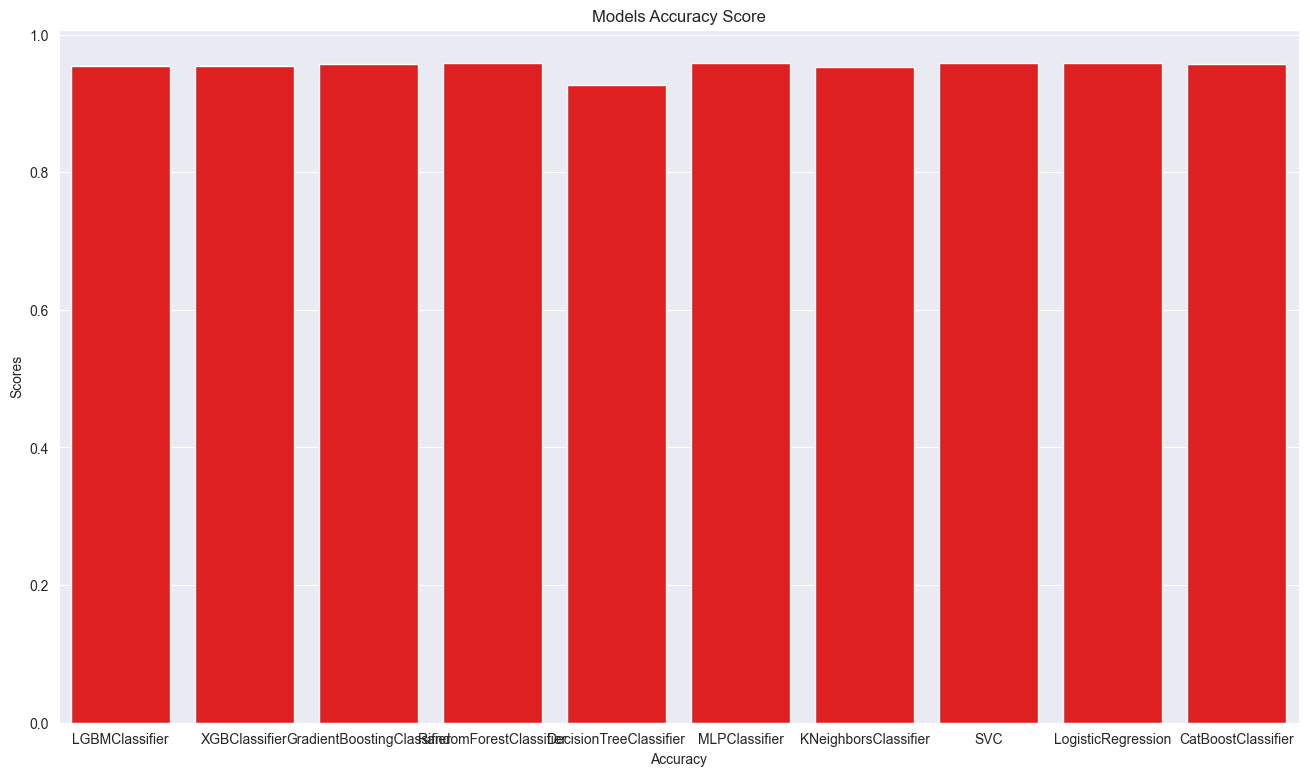

In [13]:
plt.figure(figsize=[16, 9])
sns.barplot(x='Algorithm', y='Scores', data=result_df, color="r")
plt.xlabel('Accuracy')
plt.title('Models Accuracy Score');

### Logistic Regression

In [15]:
lr = LogisticRegression()
?lr

In [16]:
lr_params = {
    "max_iter": [50, 100, 200, 500],
    "solver": ["liblinear", "lbfgs"]
}

In [17]:
lr_cv_model = GridSearchCV(LogisticRegression(), lr_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [18]:
lr_cv_model.best_params_

{'max_iter': 100, 'solver': 'lbfgs'}

In [19]:
tuned_lr_model = LogisticRegression(solver='lbfgs', max_iter=100).fit(X_train, y_train)

In [20]:
tuned_lr_model.intercept_

array([-4.25510782])

In [21]:
tuned_lr_model.coef_

array([[ 0.04282819,  1.55715048,  0.13734544,  0.08811997, -0.02053744,
        -0.04600842,  0.20043109,  0.12061673,  0.18107285]])

In [22]:
accuracy_score(y_test, tuned_lr_model.predict(X_test))

0.04081632653061224

In [24]:
cross_val_score(tuned_lr_model, X_test, y_test, cv=10).mean()

0.9591829934692789

## K Nearest Neighbors

In [28]:
knn = KNeighborsClassifier()
?knn

In [29]:
knn_params = {"n_neighbors": np.arange(5, 25)}

In [30]:
knn_cv_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10).fit(X_train, y_train)

In [31]:
knn_cv_model.best_params_

{'n_neighbors': 14}

In [32]:
knn_tuned = KNeighborsClassifier(n_neighbors=14).fit(X_train, y_train)

In [34]:
accuracy_score(y_test, knn_tuned.predict(X_test))

0.9591836734693877

In [35]:
cross_val_score(tuned_lr_model, X_test, y_test, cv=10).mean()

0.9591829934692789

## Supported Vector Machines

In [38]:
svm = SVC()
?svm

In [41]:
svm_params = {"C": [1, 3, 5, 7, 9],
              "kernel": ["linear", "rbf"],
              "max_iter": [-1, 100]}

In [42]:
svm_cv_model = GridSearchCV(SVC(), svm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [43]:
svm_cv_model.best_params_

{'C': 1, 'kernel': 'linear', 'max_iter': -1}

In [ ]:
svm_tuned = SVC(C=1, kernel="linear", max_iter=-1, verbose=2).fit(X_train, y_train)

In [48]:
accuracy_score(y_test, svm_tuned.predict(X_test))

0.9591836734693877

In [50]:
cross_val_score(svm_tuned, X_test, y_test, cv=10).mean()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

0.9591829934692789

## Artificial Neural Network

In [51]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [53]:
mlpc = MLPClassifier()
?mlpc

In [54]:
mlpc_params = {"solver": ["lbfgs", "adam"],
               "learning_rate": ["constant", "adaptive"],
               "alpha": [1, 0.1, 0.01, 0.001],
               "hidden_layer_sizes": [(10, 10, 10), (10, 10), (3, 5)]}

In [55]:
mlpc_cv_model = GridSearchCV(MLPClassifier(activation="logistic"), mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(
    X_train_scaled, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [56]:
mlpc_cv_model.best_params_

{'alpha': 1,
 'hidden_layer_sizes': (10, 10, 10),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [57]:
tuned_mlpc = MLPClassifier(solver="adam", activation='logistic', learning_rate="constant", alpha=1,
                           hidden_layer_sizes=(10, 10, 10)).fit(X_train_scaled, y_train)

In [64]:
accuracy_score(y_test, tuned_mlpc.predict(X_test_scaled))

0.9591836734693877

In [65]:
cross_val_score(tuned_mlpc, X_test, y_test, cv=10).mean()

0.9591829934692789

In [82]:
print(classification_report(y_test, tuned_mlpc.predict(X_test_scaled)))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1175
         1.0       0.00      0.00      0.00        50

    accuracy                           0.96      1225
   macro avg       0.48      0.50      0.49      1225
weighted avg       0.92      0.96      0.94      1225



In [133]:
tuned_mlpc.coefs_

[array([[-4.03009557e-04, -2.63166625e-05, -3.27975793e-04,
         -3.94499692e-04, -2.81944109e-04, -3.62281197e-04,
         -3.85607237e-04, -4.18626799e-05, -4.05360287e-04,
         -3.63321762e-04],
        [-4.88570952e-03, -4.40299733e-03, -4.39052379e-03,
         -4.68316353e-03, -5.09542910e-03, -4.70062964e-03,
         -4.86233907e-03, -4.31065700e-03, -5.07539643e-03,
         -4.52037041e-03],
        [-2.52739067e-03, -2.48522052e-03, -2.55030891e-03,
         -2.92928822e-03, -2.90335447e-03, -2.73306956e-03,
         -2.62980518e-03, -2.63973822e-03, -2.93448671e-03,
         -2.85364281e-03],
        [-3.17657966e-03, -3.02257842e-03, -2.88332891e-03,
         -2.97734935e-03, -3.12232719e-03, -2.80377491e-03,
         -2.80763023e-03, -2.84988553e-03, -2.93047812e-03,
         -2.87704906e-03],
        [-2.37738160e-03, -2.09873543e-03, -2.22538186e-03,
         -2.06198059e-03, -2.22633810e-03, -2.30784739e-03,
         -1.97691131e-03, -2.20424704e-03, -2.193487

## Classification And Regression Tree

In [66]:
cart = DecisionTreeClassifier()
?cart

In [76]:
cart_params = {"max_depth": [1, 3, 5, 8, 10, 20, 50],
               "min_samples_split": [5, 10, 20, 50, 100],
               "max_features": ["None", "auto"]}

In [77]:
cart_cv_model = GridSearchCV(DecisionTreeClassifier(), cart_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


In [78]:
cart_cv_model.best_params_

{'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 50}

In [79]:
cart_tuned = DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=50).fit(X_train, y_train)

In [80]:
accuracy_score(y_test, cart_tuned.predict(X_test))

0.9591836734693877

In [81]:
cross_val_score(cart_tuned, X_test, y_test, cv=10).mean()

0.9583633213381313

## Random Forest

In [83]:
rf = RandomForestClassifier()
?rf

In [84]:
rf_params = {"n_estimators": [100, 200, 500, 2000],
             "max_depth": [1, 3, 5, 8, 10, 20, 50],
             "min_samples_split": [2, 5, 10, 20]}

In [85]:
rf_cv_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [86]:
rf_cv_model.best_params_

{'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 100}

In [87]:
rf_tuned = RandomForestClassifier(min_samples_split=5, n_estimators=100, max_depth=50).fit(X_train, y_train)

In [88]:
accuracy_score(y_test, rf_tuned.predict(X_test))

0.9583673469387755

In [89]:
cross_val_score(rf_tuned, X_test, y_test, cv=10).mean()

0.9575436492069839

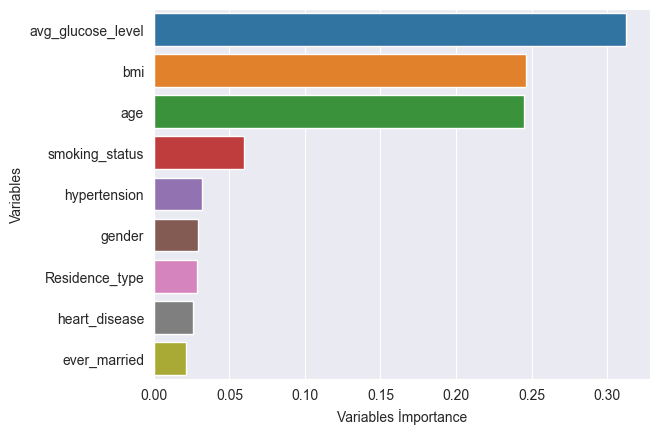

In [130]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables İmportance')
plt.ylabel('Variables')
plt.show()

## Gradient Boosting Machines

In [92]:
gbm = GradientBoostingClassifier()
?gbm

In [94]:
gbm_params = {"learning_rate": [1, 0.1, 0.01, 0.001],
              "n_estimators": [200, 500, 2000],
              "max_depth": [1, 3, 5, 8, 10, 20, 50], }

In [95]:
gbm_cv_model = GridSearchCV(GradientBoostingClassifier(), gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


In [96]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

In [98]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.1,
                                       max_depth=1,
                                       n_estimators=500).fit(X_train, y_train)

In [99]:
accuracy_score(y_test, gbm_tuned.predict(X_test))

0.9591836734693877

In [125]:
cross_val_score(gbm_tuned, X_test, y_test, cv=10).mean()

0.9526456084232974

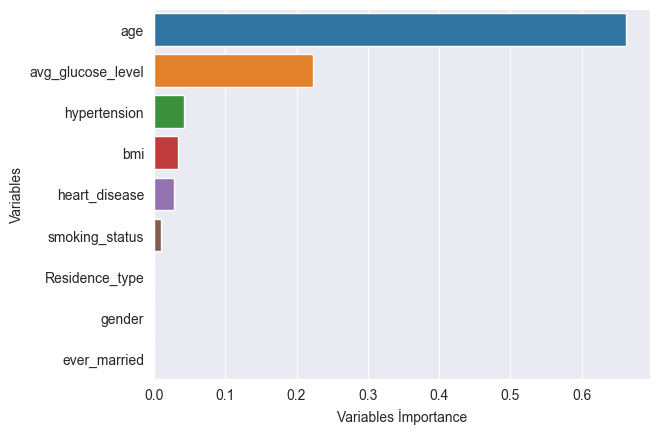

In [127]:
feature_imp = pd.Series(gbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables İmportance')
plt.ylabel('Variables')
plt.show()

## Light GBM

In [101]:
lgbm_params = {"learning_rate": [1, 0.1, 0.01, 0.001],
               "n_estimators": [200, 500, 2000],
               "max_depth": [1, 3, 5, 8, 10, 20, 50], }

In [102]:
lgbm_cv_model = GridSearchCV(LGBMClassifier(), lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


In [103]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

In [104]:
lgbmtuned = LGBMClassifier(learning_rate=0.1, max_depth=1, n_estimators=500).fit(X_train, y_train)

In [105]:
accuracy_score(y_test, lgbmtuned.predict(X_test))

0.9591836734693877

In [106]:
cross_val_score(lgbmtuned, X_test, y_test, cv=10).mean()

0.9567373050779688

## XGBoost

In [107]:
xgboost = XGBClassifier()
?xgboost

In [108]:
xgb_params = {"n_estimators": [200, 500, 1000, 2000],
              "max_depth": [1, 3, 5, 10],
              "learning_rate": [1, 0.1, 0.001, 0.01]}

In [109]:
xgb_cv_model = GridSearchCV(XGBClassifier(), xgb_params, cv=10,
                            n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [110]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 2000}

In [112]:
xgb_tuned = xgb = XGBClassifier(learning_rate=0.001, max_depth=5, n_estimators=2000).fit(X_train, y_train)

In [113]:
accuracy_score(y_test, xgb_tuned.predict(X_test))

0.9583673469387755

In [126]:
cross_val_score(xgb_tuned, X_test, y_test, cv=10).mean()

0.9518259362921497

## CatBoost

In [115]:
cb = CatBoostClassifier()
?cb

In [116]:
catb_params = {"iterations": [200, 500, 2000],
               "learning_rate": [0.001, 0.01, 0.1, 1],
               "max_depth": [1, 3, 5, 10], }

In [117]:
catb_cv_model = GridSearchCV(CatBoostClassifier(), catb_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0:	learn: 0.5636478	total: 1.64ms	remaining: 819ms
1:	learn: 0.4475431	total: 3.04ms	remaining: 756ms
2:	learn: 0.3779772	total: 4.3ms	remaining: 712ms
3:	learn: 0.3280654	total: 5.68ms	remaining: 705ms
4:	learn: 0.2882766	total: 6.91ms	remaining: 684ms
5:	learn: 0.2609369	total: 8.36ms	remaining: 689ms
6:	learn: 0.2386456	total: 9.52ms	remaining: 670ms
7:	learn: 0.2192161	total: 10.7ms	remaining: 659ms
8:	learn: 0.1999212	total: 12ms	remaining: 653ms
9:	learn: 0.1922738	total: 13.2ms	remaining: 647ms
10:	learn: 0.1851081	total: 14.2ms	remaining: 633ms
11:	learn: 0.1805709	total: 15.3ms	remaining: 623ms
12:	learn: 0.1755325	total: 16.5ms	remaining: 618ms
13:	learn: 0.1717730	total: 17.7ms	remaining: 613ms
14:	learn: 0.1671386	total: 18.8ms	remaining: 608ms
15:	learn: 0.1621442	total: 19.9ms	remaining: 603ms
16:	learn: 0.1606759	total: 21.1ms	remaining: 600ms
17:	learn: 0.1580232	total: 22.1ms	remaining: 593ms
18:	learn: 0.15

In [118]:
catb_cv_model.best_params_

{'iterations': 500, 'learning_rate': 0.1, 'max_depth': 1}

In [119]:
catb_tuned = CatBoostClassifier(iterations=500, learning_rate=0.1, max_depth=1).fit(X_train, y_train)

0:	learn: 0.5636478	total: 2.13ms	remaining: 1.06s
1:	learn: 0.4475431	total: 3.64ms	remaining: 907ms
2:	learn: 0.3779772	total: 4.97ms	remaining: 823ms
3:	learn: 0.3280654	total: 6.5ms	remaining: 806ms
4:	learn: 0.2882766	total: 7.92ms	remaining: 784ms
5:	learn: 0.2609369	total: 9.36ms	remaining: 771ms
6:	learn: 0.2386456	total: 10.6ms	remaining: 748ms
7:	learn: 0.2192161	total: 12.3ms	remaining: 756ms
8:	learn: 0.1999212	total: 14.2ms	remaining: 775ms
9:	learn: 0.1922738	total: 16ms	remaining: 785ms
10:	learn: 0.1851081	total: 17.5ms	remaining: 778ms
11:	learn: 0.1805709	total: 19ms	remaining: 771ms
12:	learn: 0.1755325	total: 20.4ms	remaining: 765ms
13:	learn: 0.1717730	total: 21.8ms	remaining: 758ms
14:	learn: 0.1671386	total: 23.3ms	remaining: 752ms
15:	learn: 0.1621442	total: 24.7ms	remaining: 747ms
16:	learn: 0.1606759	total: 26.6ms	remaining: 755ms
17:	learn: 0.1580232	total: 28ms	remaining: 751ms
18:	learn: 0.1566764	total: 29.5ms	remaining: 748ms
19:	learn: 0.1555002	total: 3

In [120]:
accuracy_score(y_test, catb_tuned.predict(X_test))

0.9591836734693877

In [128]:
cross_val_score(catb_tuned, X_test, y_test, cv=10).mean()

0:	learn: 0.5429262	total: 948us	remaining: 473ms
1:	learn: 0.4480479	total: 1.82ms	remaining: 452ms
2:	learn: 0.3779709	total: 2.89ms	remaining: 479ms
3:	learn: 0.3253296	total: 4.04ms	remaining: 501ms
4:	learn: 0.2837942	total: 5.18ms	remaining: 513ms
5:	learn: 0.2552968	total: 6ms	remaining: 494ms
6:	learn: 0.2330181	total: 6.86ms	remaining: 483ms
7:	learn: 0.2172253	total: 7.67ms	remaining: 472ms
8:	learn: 0.2029856	total: 8.61ms	remaining: 470ms
9:	learn: 0.1937823	total: 9.91ms	remaining: 486ms
10:	learn: 0.1863055	total: 11.1ms	remaining: 494ms
11:	learn: 0.1806363	total: 12.1ms	remaining: 492ms
12:	learn: 0.1680399	total: 12.9ms	remaining: 485ms
13:	learn: 0.1654089	total: 13.8ms	remaining: 479ms
14:	learn: 0.1614269	total: 14.7ms	remaining: 474ms
15:	learn: 0.1600721	total: 15.8ms	remaining: 477ms
16:	learn: 0.1576638	total: 16.8ms	remaining: 478ms
17:	learn: 0.1555579	total: 17.9ms	remaining: 480ms
18:	learn: 0.1536308	total: 18.7ms	remaining: 473ms
19:	learn: 0.1521217	total

0.9551046248167399

## A Few Prediction

In [136]:
_df = pd.read_csv("./src/after_label_encoder.csv")

In [138]:
_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,_gender,_ever_married,_smoking_status,_Residence_type
0,0,71.0,1,0,1,0,195.25,33.3,2,0,Female,Yes,never smoked,Rural
1,1,4.0,0,0,0,1,81.33,18.6,0,0,Male,No,Unknown,Urban
2,1,34.0,0,1,1,1,106.23,NaN,1,0,Male,Yes,formerly smoked,Urban
3,0,65.0,0,0,1,0,108.80,33.5,0,0,Female,Yes,Unknown,Rural
4,0,75.0,0,0,1,0,106.33,27.8,0,0,Female,Yes,Unknown,Rural


In [146]:
tuned_mlpc.predict([[1, 20.0, 0, 0, 0, 1, 100, 26.57, 0]])

array([0.])